In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
tips = sns.load_dataset('tips')

In [3]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [8]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Dense(units=32, activation='relu'))

In [16]:
model.add(Dense(units=1, activation='linear'))  # Assuming regression task (predicting 'tip')

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error for regression

In [18]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 12.9176 - val_loss: 9.8319
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.6334 - val_loss: 9.6858
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.5213 - val_loss: 9.5860
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.9840 - val_loss: 9.4775
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.2830 - val_loss: 9.3793
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.4991 - val_loss: 9.2825
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.8960 - val_loss: 9.1685
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.1340 - val_loss: 9.0420
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.0916 - val_loss: 8.8928
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.3131 - val_loss: 8.7034
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8671 - val_loss: 8.4486
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.9

In [19]:
y_pred = model.predict(X_test)
print("Predictions: ", y_pred[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predictions:  [[3.277871 ]
 [2.108288 ]
 [4.066161 ]
 [2.8175545]
 [2.615675 ]]


In [20]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

Test Loss: 1.2889821529388428


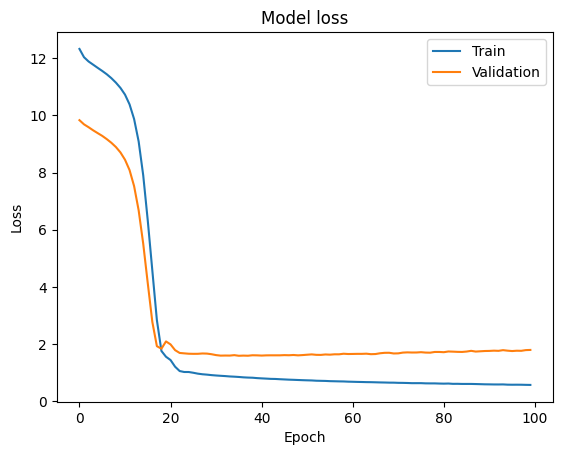

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()